In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_json("Datasets/titanic.json", lines = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
df["Age"] = imputer.fit_transform(df[["Age"]])
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.dropna(subset = ["Embarked"],inplace = True)
df.shape

(889, 12)

In [13]:
df.drop("Cabin",axis = 1,inplace = True)
df.shape

(889, 11)

In [25]:
# Age	Numeric	Bin into age groups
# Fare	Numeric	Bin into quartiles or quantiles

age_bins = [0, 12, 18, 60, 100]
age_labels = ['Child', 'Teen', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [19]:
df['FareBand'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,Medium


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Adult,Medium


In [22]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df["Embarked"] = encoder.fit_transform(df[["Embarked"]])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2.0,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.0,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2.0,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0,Adult,Medium
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,1.0,Adult,Medium
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2.0,Adult,Very High
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2.0,Child,High
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2.0,Adult,Medium
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0.0,Teen,High


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Fare"] = scaler.fit_transform(df[["Fare"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.014151,2.0,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,0.139136,0.0,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.015469,2.0,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.103644,2.0,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.015713,2.0,Adult,Medium


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,2.0,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,0.0,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,2.0,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,2.0,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,2.0,Adult,Medium


<Axes: ylabel='Age'>

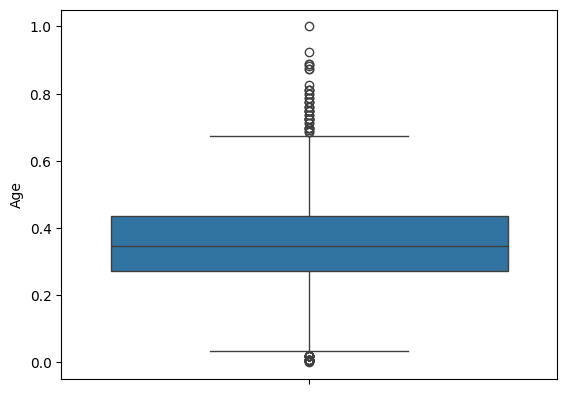

In [26]:
# Outliers
sns.boxplot(y="Age",data = df)

<Axes: ylabel='Fare'>

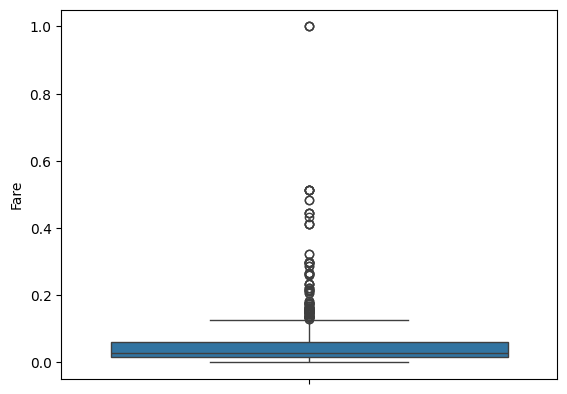

In [27]:
sns.boxplot(y="Fare",data = df)

<Axes: ylabel='Age'>

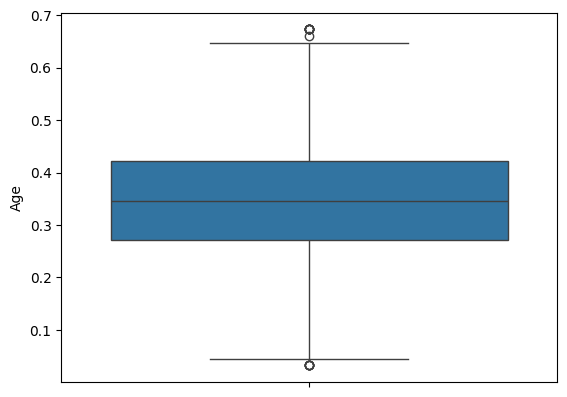

In [28]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Age"]>= lower_bound) & (df["Age"]<= upper_bound)]
sns.boxplot(y = "Age", data =df)

<Axes: ylabel='Fare'>

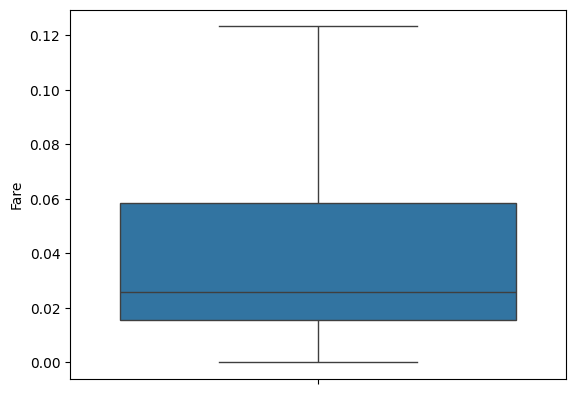

In [29]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Fare"] = np.where(df["Fare"]>upper_bound , upper_bound , np.where(df["Fare"] < lower_bound , lower_bound , df["Fare"] ))
sns.boxplot(y="Fare" , data =df)

In [4]:
# 2. tips dataset
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
df2 = sns.load_dataset("tips")

In [6]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df2.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df2.shape

(244, 7)

In [9]:
df2.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [20]:
# Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2["sex"] = encoder.fit_transform(df2["sex"])
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2["smoker"]= encoder.fit_transform(df2["smoker"])
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


In [15]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3
3,23.68,3.31,1,0,Sun,Dinner,2
4,24.59,3.61,0,0,Sun,Dinner,4


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2["tip"] = scaler.fit_transform(df2[["tip"]])
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,0.001111,0,0,Sun,Dinner,2
1,10.34,0.073333,1,0,Sun,Dinner,3
2,21.01,0.277778,1,0,Sun,Dinner,3
3,23.68,0.256667,1,0,Sun,Dinner,2
4,24.59,0.290000,0,0,Sun,Dinner,4


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2["total_bill"] = scaler.fit_transform(df2[["total_bill"]])
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0,0,Sun,Dinner,2
1,0.152283,0.073333,1,0,Sun,Dinner,3
2,0.375786,0.277778,1,0,Sun,Dinner,3
3,0.431713,0.256667,1,0,Sun,Dinner,2
4,0.450775,0.290000,0,0,Sun,Dinner,4


In [21]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df2["time"] = encoder.fit_transform(df2[["time"]])
df2.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0,0,Sun,0.0,2
1,0.152283,0.073333,1,0,Sun,0.0,3
2,0.375786,0.277778,1,0,Sun,0.0,3
3,0.431713,0.256667,1,0,Sun,0.0,2
4,0.450775,0.290000,0,0,Sun,0.0,4
5,0.465438,0.412222,1,0,Sun,0.0,4
6,0.119397,0.111111,1,0,Sun,0.0,2
7,0.498743,0.235556,1,0,Sun,0.0,4
8,0.250733,0.106667,1,0,Sun,0.0,2
9,0.245287,0.247778,1,0,Sun,0.0,2


In [23]:

df2["tip_bins"] = pd.cut(df2["tip"], bins =4,labels=["low", "medium", "high", "generous"])

In [26]:
df2.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_bins
0,0.291579,0.001111,0,0,Sun,0.0,2,low
1,0.152283,0.073333,1,0,Sun,0.0,3,low
2,0.375786,0.277778,1,0,Sun,0.0,3,medium
3,0.431713,0.256667,1,0,Sun,0.0,2,medium
4,0.450775,0.290000,0,0,Sun,0.0,4,medium
5,0.465438,0.412222,1,0,Sun,0.0,4,medium
6,0.119397,0.111111,1,0,Sun,0.0,2,low
7,0.498743,0.235556,1,0,Sun,0.0,4,low
8,0.250733,0.106667,1,0,Sun,0.0,2,low
9,0.245287,0.247778,1,0,Sun,0.0,2,low


In [30]:
df2["time"] = pd.cut(df2["time"],bins = 3, labels=["Dinner", "Lunch", "Breakfast"])

In [31]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bins
0,0.291579,0.001111,0,0,Sun,Dinner,2,low
1,0.152283,0.073333,1,0,Sun,Dinner,3,low
2,0.375786,0.277778,1,0,Sun,Dinner,3,medium
3,0.431713,0.256667,1,0,Sun,Dinner,2,medium
4,0.450775,0.290000,0,0,Sun,Dinner,4,medium


In [33]:
# 3. Flights

In [45]:
df3 = sns.load_dataset("flights")
df3.head(20)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [46]:
from sklearn.preprocessing import StandardScaler
df3['passengers'] = StandardScaler().fit_transform(df3[['passengers']])


In [47]:
df3.head()

,year,month,passengers
0,1949,Jan,-1.407779
1,1949,Feb,-1.357590
2,1949,Mar,-1.240483
3,1949,Apr,-1.265578
4,1949,May,-1.332496


In [49]:
df3.head()

,year,month,passengers
0,1949,Jan,-1.407779
1,1949,Feb,-1.357590
2,1949,Mar,-1.240483
3,1949,Apr,-1.265578
4,1949,May,-1.332496


In [50]:
df3['passenger_bin'] = pd.qcut(df3['passengers'], q=3, labels=['Low', 'Medium', 'High'])


In [54]:
df3.head(20)

,year,month,passengers,passenger_bin
0,1949,Jan,-1.407779,Low
1,1949,Feb,-1.357590,Low
2,1949,Mar,-1.240483,Low
3,1949,Apr,-1.265578,Low
4,1949,May,-1.332496,Low
5,1949,Jun,-1.215389,Low
6,1949,Jul,-1.106647,Low
7,1949,Aug,-1.106647,Low
8,1949,Sep,-1.207024,Low
9,1949,Oct,-1.349225,Low


In [57]:
from sklearn.preprocessing import OrdinalEncoder
month_order = [['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
encoder = OrdinalEncoder(categories=month_order)
df3['month'] = df3['month'].astype(str)
df3['month'] = encoder.fit_transform(df3[['month']]).astype(int) + 1


In [58]:
df3.head()

,year,month,passengers,passenger_bin,month_num
0,1949,1,-1.407779,Low,1
1,1949,2,-1.357590,Low,2
2,1949,3,-1.240483,Low,3
3,1949,4,-1.265578,Low,4
4,1949,5,-1.332496,Low,5


In [60]:
df3.drop("month_num",axis = 1, inplace = True)

In [61]:
df3.head()

,year,month,passengers,passenger_bin
0,1949,1,-1.407779,Low
1,1949,2,-1.357590,Low
2,1949,3,-1.240483,Low
3,1949,4,-1.265578,Low
4,1949,5,-1.332496,Low
